<center> <h1>Linear Regression Model To Predict Life Expectancy of Indiviuals from Different Countries</h1> </center>


<center> <h3>A. Problem Description</h3> </center>

<h3>Model Description:</h3>
<ul>
    <li>The model used in this analysis is a linear regression model, aiming to establish a linear relationship between the dependent variable, "Life expectancy," and 17 independent variables.</li>
    <li>The 17 independent variables are: "Country," "Year," "Status," "Population," "Hepatitis B," "Measles," "Polio," "Diphtheria," "HIV/AIDS," "Infant deaths," "Under-five deaths," "Total expenditure," "GDP," "BMI," "Thinness (1-19 years)," "Alcohol," and "Schooling."</li>
    <li>The model estimates coefficients for each input feature, representing the strength and direction of their influence on the target variable, "Life expectancy."</li>
</ul>

<h3>Our project aims to:</h3>
<ul>
    <ul>
    <li>Perform a comprehensive analysis of the "Life Expectancy" attribute, which serves as the target feature.</li>
    <li>Utilize the remaining fields in the dataset as input features for conducting extensive linear regression testing.</li>
    <li>Explore the intricate relationships and correlations between the input features and the target feature (life expectancy).</li>
    <li>Identify and determine the significant factors that wield substantial influence on the captivating realm of life expectancy.</li>
</ul>
</ul>

<center><h3>B. Data Summary</h3></center>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split , GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

In [2]:
# Reading the Data and storing it as a Data Frame
df = pd.read_csv('./life_expectancy.csv')
df.head(10)

Country  Year      Status  Population  Hepatitis B  Measles  Polio  \
0  Afghanistan  2015  Developing  33736494.0         65.0     1154    6.0   
1  Afghanistan  2014  Developing    327582.0         62.0      492   58.0   
2  Afghanistan  2013  Developing  31731688.0         64.0      430   62.0   
3  Afghanistan  2012  Developing   3696958.0         67.0     2787   67.0   
4  Afghanistan  2011  Developing   2978599.0         68.0     3013   68.0   
5  Afghanistan  2010  Developing   2883167.0         66.0     1989   66.0   
6  Afghanistan  2009  Developing    284331.0         63.0     2861   63.0   
7  Afghanistan  2008  Developing   2729431.0         64.0     1599   64.0   
8  Afghanistan  2007  Developing  26616792.0         63.0     1141   63.0   
9  Afghanistan  2006  Developing   2589345.0         64.0     1990   58.0   

   Diphtheria  HIV/AIDS  infant deaths  under-five deaths  Total expenditure  \
0        65.0       0.1             62                 83               8.16   
1        62.0       0.1             64                 86               8.18   
2        64.0       0.1             66                 89               8.13   
3        67.0       0.1             69                 93               8.52   
4        68.0       0.1             71                 97               7.87   
5        66.0       0.1             74                102               9.20   
6        63.0       0.1             77                106               9.42   
7        64.0       0.1             80                110               8.33   
8        63.0       0.1             82                113               6.73   
9        58.0       0.1             84                116               7.43   

          GDP   BMI  thinness  1-19 years  Alcohol  Schooling  Life expectancy  
0  584.259210  19.1                  17.2     0.01       10.1             65.0  
1  612.696514  18.6                  17.5     0.01       10.0             59.9  
2  631.744976  18.1                  17.7     0.01        9.9             59.9  
3  669.959000  17.6                  17.9     0.01        9.8             59.5  
4   63.537231  17.2                  18.2     0.01        9.5             59.2  
5  553.328940  16.7                  18.4     0.01        9.2             58.8  
6  445.893298  16.2                  18.6     0.01        8.9             58.6  
7  373.361116  15.7                  18.8     0.03        8.7             58.1  
8  369.835796  15.2                  19.0     0.02        8.4             57.5  
9  272.563770  14.7                  19.2     0.03        8.1             57.3

In [3]:
# Reading the info of the Dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2848 entries, 0 to 2847
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Country               2848 non-null   object 
 1   Year                  2848 non-null   int64  
 2   Status                2848 non-null   object 
 3   Population            2204 non-null   float64
 4   Hepatitis B           2306 non-null   float64
 5   Measles               2848 non-null   int64  
 6   Polio                 2829 non-null   float64
 7   Diphtheria            2829 non-null   float64
 8   HIV/AIDS              2848 non-null   float64
 9   infant deaths         2848 non-null   int64  
 10  under-five deaths     2848 non-null   int64  
 11  Total expenditure     2627 non-null   float64
 12  GDP                   2406 non-null   float64
 13  BMI                   2816 non-null   float64
 14  thinness  1-19 years  2816 non-null   float64
 15  Alcohol              

In [4]:
df.describe()

Year    Population  Hepatitis B        Measles        Polio  \
count  2848.000000  2.204000e+03  2306.000000    2848.000000  2829.000000   
mean   2007.500000  1.283457e+07    81.076756    2083.082163    82.682220   
std       4.610582  6.196094e+07    25.019068   10249.107207    23.434954   
min    2000.000000  3.400000e+01     1.000000       0.000000     3.000000   
25%    2003.750000  1.967585e+05    77.000000       0.000000    78.000000   
50%    2007.500000  1.391756e+06    92.000000      16.000000    93.000000   
75%    2011.250000  7.438947e+06    97.000000     336.750000    97.000000   
max    2015.000000  1.293859e+09    99.000000  212183.000000    99.000000   

        Diphtheria     HIV/AIDS  infant deaths  under-five deaths  \
count  2829.000000  2848.000000    2848.000000        2848.000000   
mean     82.451396     1.756461      28.359902          39.500000   
std      23.693936     5.148935     117.188032         159.800866   
min       2.000000     0.100000       0.000000           0.000000   
25%      78.000000     0.100000       0.000000           0.000000   
50%      93.000000     0.100000       3.000000           4.000000   
75%      97.000000     0.700000      20.000000          25.000000   
max      99.000000    50.600000    1800.000000        2500.000000   

       Total expenditure            GDP          BMI  thinness  1-19 years  \
count        2627.000000    2406.000000  2816.000000           2816.000000   
mean            5.935577    7664.398813    38.503374              4.847230   
std             2.504439   14466.241793    19.955485              4.443695   
min             0.370000       1.681350     1.000000              0.100000   
25%             4.240000     477.541713    19.500000              1.600000   
50%             5.760000    1841.086830    43.900000              3.300000   
75%             7.530000    6265.658907    56.200000              7.125000   
max            17.600000  119172.741800    77.600000             27.700000   

           Alcohol    Schooling  Life expectancy  
count  2660.000000  2688.000000      2848.000000  
mean      4.638932    12.060156        69.347402  
std       4.064721     3.320160         9.528332  
min       0.010000     0.000000        36.300000  
25%       0.930000    10.200000        63.500000  
50%       3.785000    12.400000        72.200000  
75%       7.810000    14.300000        75.800000  
max      17.870000    20.700000        89.000000

In [5]:
df.describe(include = "object")

Country      Status
count          2848        2848
unique          178           2
top     Afghanistan  Developing
freq             16        2352

In [6]:
# Checking for any Duplicates
print("Number of duplicate data : ",df.duplicated().sum())

Number of duplicate data :  0


In [7]:
# Counting the Number of Null Values
df.isna().sum()

Country                   0
Year                      0
Status                    0
Population              644
Hepatitis B             542
Measles                   0
Polio                    19
Diphtheria               19
HIV/AIDS                  0
infant deaths             0
under-five deaths         0
Total expenditure       221
GDP                     442
BMI                      32
thinness  1-19 years     32
Alcohol                 188
Schooling               160
Life expectancy           0
dtype: int64

<h5>
    As there are Null Values within the dataset, we need to do some data preprocessing to handle them.
    We decided to go with Imputation Approach - We will be calculating the mean and median value across and replace the Null Values.
</h5>

Reference Articles: https://towardsdatascience.com/6-different-ways-to-compensate-for-missing-values-data-imputation-with-examples-6022d9ca0779

<h5>Some other things we are doing with the dataset:</h5>
    <ul>
        <li>Replacing the categorical field values of 'Status' to 0,1. Developing: 0 and Developed: 1</li>
        <li>Dropping the field 'Country'</li>
    </ul>

<h4>

</h4>

In [8]:
class Preprocessing(): 
    def __init__(self):
        self.col_means = {}
        self.col_medians = {}
    
    def fit(self, data):
        cols_with_na = data.isna().sum()[data.isna().sum()>0].index.tolist()
        for col in cols_with_na:
            self.col_means[col] = data.groupby('Country')[col].transform('mean')
            self.col_medians[col] = data[col].median()

    def transform(self, data):
        cols_with_na = data.isna().sum()[data.isna().sum()>0].index.tolist()
        # Calculating Mean
        for col in cols_with_na:
            mean_value = self.col_means[col]
            data.loc[:, col].fillna(mean_value, inplace=True)

        cols_with_na = data.isna().sum()[data.isna().sum()>0].index.tolist()
        # Calculating Mean
        for col in cols_with_na:
            median_value = self.col_medians[col]
            data.loc[:, col].fillna(median_value, inplace=True)

        # Replacing the status column to 0,1 as this is a categorial field
        data['Status'].replace({'Developing' : 0, 'Developed' : 1,}, inplace=True)
    
        # Drop 'Country' column as it contains non-numeric values
        data.drop(columns=['Country'], inplace=True)
    
        return data

    
    def fit_transform(self, data):
        self.fit(data)
        return self.transform(data)

In [9]:
preprocesser = Preprocessing()
modified_df = preprocesser.fit_transform(df)

In [10]:
modified_df.head(15)

Year  Status  Population  Hepatitis B  Measles  Polio  Diphtheria  \
0   2015       0  33736494.0         65.0     1154    6.0        65.0   
1   2014       0    327582.0         62.0      492   58.0        62.0   
2   2013       0  31731688.0         64.0      430   62.0        64.0   
3   2012       0   3696958.0         67.0     2787   67.0        67.0   
4   2011       0   2978599.0         68.0     3013   68.0        68.0   
5   2010       0   2883167.0         66.0     1989   66.0        66.0   
6   2009       0    284331.0         63.0     2861   63.0        63.0   
7   2008       0   2729431.0         64.0     1599   64.0        64.0   
8   2007       0  26616792.0         63.0     1141   63.0        63.0   
9   2006       0   2589345.0         64.0     1990   58.0        58.0   
10  2005       0    257798.0         66.0     1296   58.0        58.0   
11  2004       0  24118979.0         67.0      466    5.0         5.0   
12  2003       0   2364851.0         65.0      798   41.0        41.0   
13  2002       0  21979923.0         64.0     2486   36.0        36.0   
14  2001       0   2966463.0         63.0     8762   35.0        33.0   

    HIV/AIDS  infant deaths  under-five deaths  Total expenditure         GDP  \
0        0.1             62                 83               8.16  584.259210   
1        0.1             64                 86               8.18  612.696514   
2        0.1             66                 89               8.13  631.744976   
3        0.1             69                 93               8.52  669.959000   
4        0.1             71                 97               7.87   63.537231   
5        0.1             74                102               9.20  553.328940   
6        0.1             77                106               9.42  445.893298   
7        0.1             80                110               8.33  373.361116   
8        0.1             82                113               6.73  369.835796   
9        0.1             84                116               7.43  272.563770   
10       0.1             85                118               8.70   25.294130   
11       0.1             87                120               8.79  219.141353   
12       0.1             87                122               8.82  198.728544   
13       0.1             88                122               7.76  187.845950   
14       0.1             88                122               7.80  117.496980   

     BMI  thinness  1-19 years  Alcohol  Schooling  Life expectancy  
0   19.1                  17.2     0.01       10.1             65.0  
1   18.6                  17.5     0.01       10.0             59.9  
2   18.1                  17.7     0.01        9.9             59.9  
3   17.6                  17.9     0.01        9.8             59.5  
4   17.2                  18.2     0.01        9.5             59.2  
5   16.7                  18.4     0.01        9.2             58.8  
6   16.2                  18.6     0.01        8.9             58.6  
7   15.7                  18.8     0.03        8.7             58.1  
8   15.2                  19.0     0.02        8.4             57.5  
9   14.7                  19.2     0.03        8.1             57.3  
10  14.2                  19.3     0.02        7.9             57.3  
11  13.8                  19.5     0.02        6.8             57.0  
12  13.4                  19.7     0.01        6.5             56.7  
13  13.0                  19.9     0.01        6.2             56.2  
14  12.6                   2.1     0.01        5.9             55.3

In [11]:
modified_df.isna().sum()

Year                    0
Status                  0
Population              0
Hepatitis B             0
Measles                 0
Polio                   0
Diphtheria              0
HIV/AIDS                0
infant deaths           0
under-five deaths       0
Total expenditure       0
GDP                     0
BMI                     0
thinness  1-19 years    0
Alcohol                 0
Schooling               0
Life expectancy         0
dtype: int64

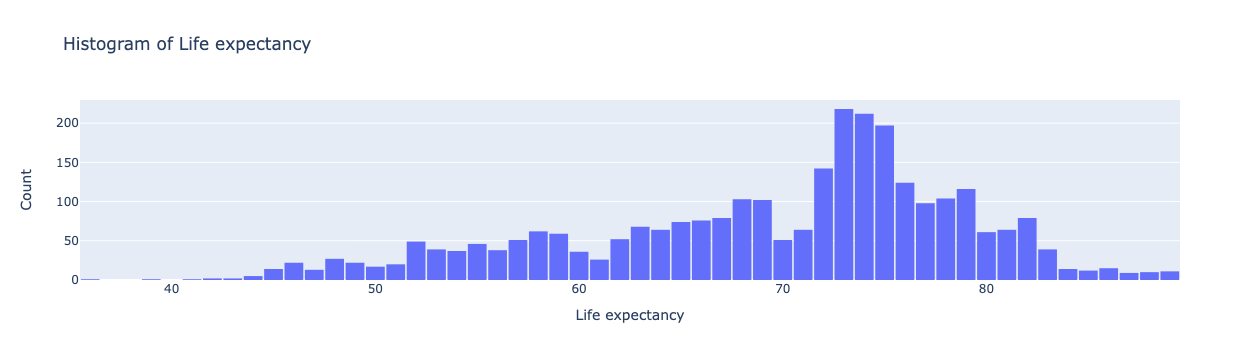

In [12]:
# Histogram of the Target Feature - Life Expectancy
fig_hist = px.histogram(modified_df, x="Life expectancy", title="Histogram of Life expectancy")
fig_hist.update_layout(yaxis_title="Count", bargap=0.08)
fig_hist.show()

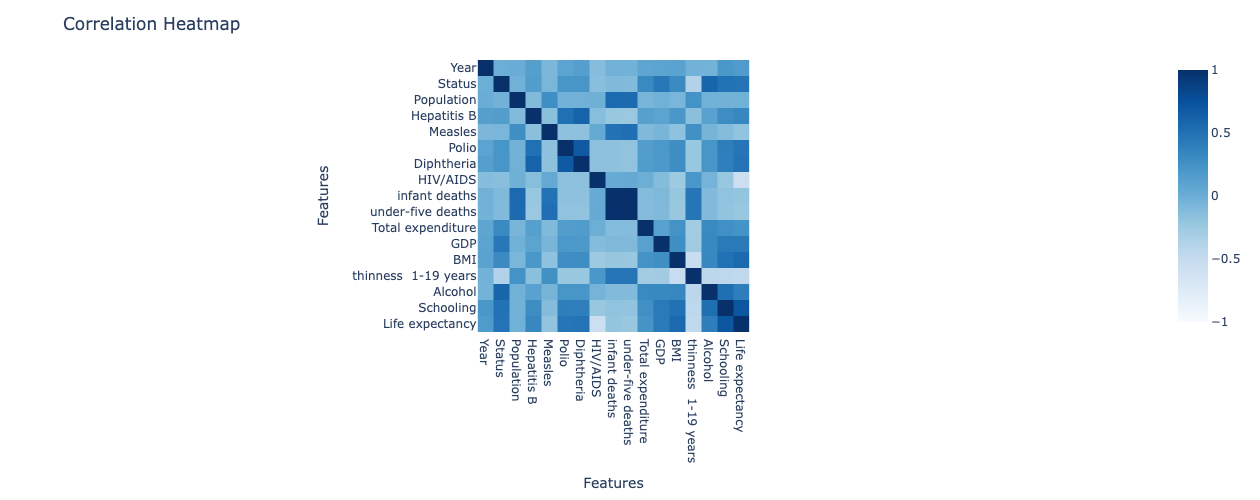

In [13]:
# Correlation Heatmap of All Features of Dataset
df_corr = modified_df.corr(numeric_only=True)

fig = px.imshow(df_corr,
                labels=dict(x="Features", y="Features"),
                x=df_corr.columns,
                y=df_corr.columns,
                color_continuous_scale="Blues",
                color_continuous_midpoint=0)

fig.update_layout(
    title="Correlation Heatmap",
    width=800,
    height=500,
    xaxis_showgrid=False,
    yaxis_showgrid=False,
    yaxis_autorange='reversed')

fig.show()

In [14]:
# Check summary statistics
modified_df.describe().style.background_gradient(cmap='Blues')

<center>
    <h3>C. Data Splitting</h3>
</center>

<h4>Dividing the dataset into training and testing sets with 80% and 20%</h4>

In [15]:
# Initalizing Dataframes
X = modified_df.drop(columns=['Life expectancy'])
y = modified_df['Life expectancy']

# Splitting the Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

<center>
    <h3>D. Data Visualization</h3>
</center>

In [16]:
class SampleVisualization:
    def __init__(self, input_data):
        self.data = input_data.copy()

class ChildSampleVisualization(SampleVisualization):
    def __init__(self, input_data):
        super().__init__(input_data)
 
    def visualize_scatter(self, target, input_features, plot_n_rows, plot_n_columns):
        # Create subplots for scatter plots
        fig, axs = plt.subplots(nrows=plot_n_rows, ncols=plot_n_columns, figsize=(20, 60))
        
        # Adjust the spacing between subplots
        plt.subplots_adjust(wspace=0.5, hspace=0.5)

        axs_flat = axs.ravel()  # Flatten the array
        # Iterate through input_features and plot each feature against the target
        for i, column in enumerate(input_features):
            ax = axs_flat[i]  # Access the subplots using flattened indexing
            ax.scatter(self.data[column], self.data[target])
            ax.set_title(column)
            ax.set_xlabel(column)
            ax.set_ylabel(target)
        # Display the scatter plots
        plt.show()    
    
    def visualize_boxplot(self, target, input_features, plot_n_rows, plot_n_columns):
        # Create subplots for box plots
        fig, axs = plt.subplots(nrows=plot_n_rows, ncols=plot_n_columns, figsize=(10, 5))
        
        # Adjust the spacing between subplots
        plt.subplots_adjust(wspace=2, hspace=1)

        axs_flat = axs.ravel()
        # Iterate through input_features and plot each feature against the target
        for i, column in enumerate(input_features):
            ax = axs_flat[i]
            self.data.boxplot(column=target, by=column, ax=ax)
            ax.set_title(f"{target} vs. {column}")
            ax.set_xlabel(column)
            ax.set_ylabel(target)
            ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
        # Display the box plots
        plt.show()

In [17]:
# Train DataSet
train_df = pd.concat([X_train, y_train], axis=1)

visualization_object = ChildSampleVisualization(train_df)

In [18]:
# Defining the Features
target_feature = 'Life expectancy'
scatter_plot_features = [
    'Population', 'Hepatitis B', 'Measles', 'Polio', 'Diphtheria', 'HIV/AIDS', 'infant deaths',
    'under-five deaths', 'Total expenditure', 'GDP', 'BMI', 'thinness  1-19 years', 'Alcohol', 
    'Schooling'
]
boxplot_features = ["Year", "Status"]

In [19]:
# Scatter plot
scatterplot_rows = 7
scatterplot_columns = 2

visualization_object.visualize_scatter(target=target_feature, input_features=scatter_plot_features,
                                       plot_n_rows=scatterplot_rows, plot_n_columns=scatterplot_columns)


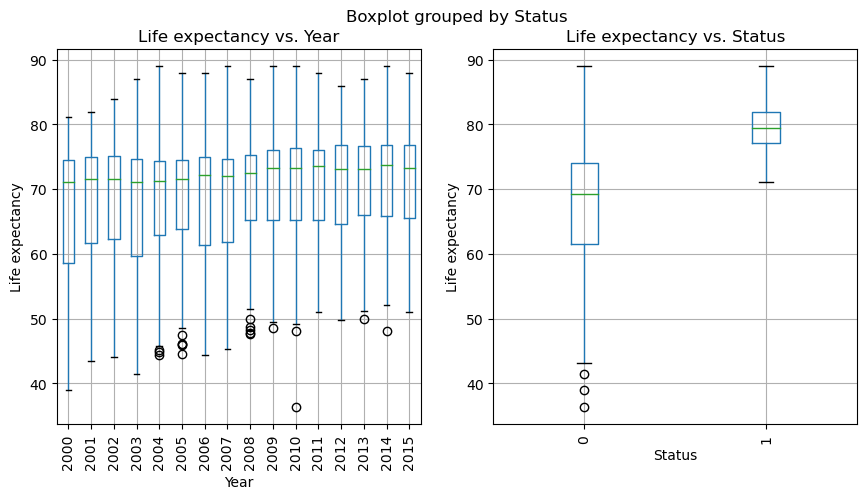

In [20]:
#Box Plot
boxplot_rows = 1
boxplot_columns = 2
# Plot box plots of the input features against the target feature
visualization_object.visualize_boxplot(target=target_feature, input_features=boxplot_features,
                                       plot_n_rows=boxplot_rows, plot_n_columns=boxplot_columns)

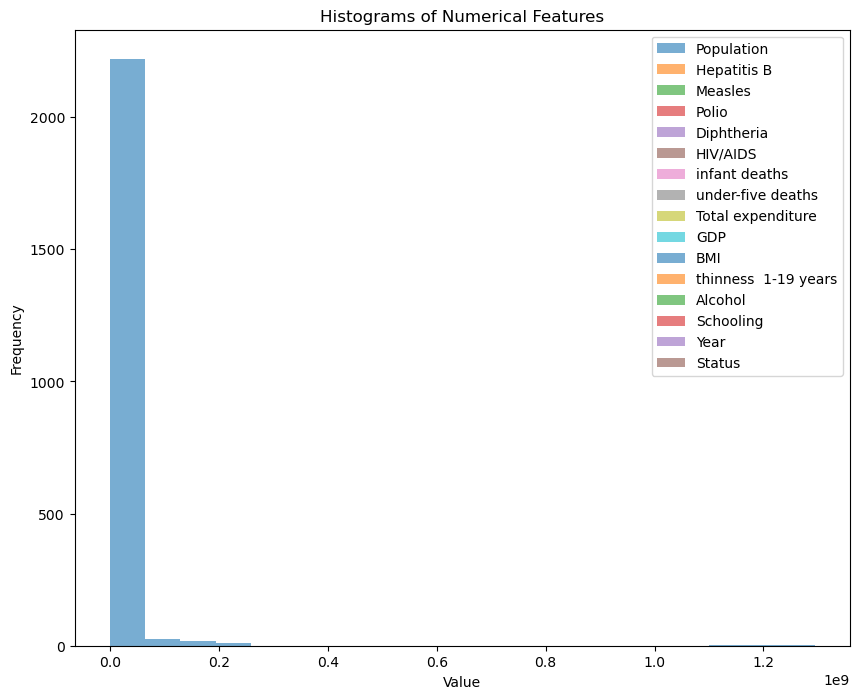

In [21]:
# Histogram of the Features
total_features = scatter_plot_features + boxplot_features

plt.figure(figsize=(10, 8))
for column in total_features:
    plt.hist(train_df[column], bins=20, alpha=0.6, label=column)

plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histograms of Numerical Features')
plt.legend()
plt.show()

<center>
    <h3>E. Feature selection</h3>
    <h4>Using the SelectKBest with f_regression to select the top 5 features</h4>
</center>

In [22]:
# f_regression to select the Top 5 Features
selector = SelectKBest(score_func=f_regression, k=5)
X_selected = selector.fit_transform(X_train, y_train)

# Get the selected feature names
selected_feature_names = X.columns[selector.get_support()].tolist()

print("Selected Features:", selected_feature_names)
# selected_feature_names = ['thinness  1-19 years', 'under-five deaths', 'HIV/AIDS', 'BMI', 'Schooling']

Selected Features: ['Status', 'Diphtheria', 'HIV/AIDS', 'BMI', 'Schooling']


In [23]:
# Creating the DataSets with the selected features. We will be using this new Datasets to Train the Model
X_train_selected = X_train[selected_feature_names]
X_test_selected = X_test[selected_feature_names]

<center>
    <h3>F. Model Selection and hyper parameter optimization</h3>
    We have decided to Use LinearRegression, DecisionTreeRegression and KNeighborsRegression for our model
</center>

In [24]:
# Define the models
linear_model = LinearRegression()
decision_tree_model = DecisionTreeRegressor()
kneighbors_model = KNeighborsRegressor()

# Define the hyperparameter grids for each model
linear_param_grid = {}

decision_tree_param_grid = {
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [15, 20, 25, 30, 35],
    'min_samples_leaf': [1, 2, 4, 6, 8, 10]
}

kneighbors_param_grid = {
    'n_neighbors': range(3,11,2),
    'weights': ['uniform', 'distance'],
    'p': [5, 6]
}

In [25]:
# GridSearch for Linear Regression
grid_search_linear = GridSearchCV(linear_model, param_grid=linear_param_grid, scoring='neg_mean_squared_error', cv=5)
grid_search_linear.fit(X_train_selected, y_train) # Training the model with Selected Train DataSet
best_linear_model = grid_search_linear.best_estimator_

In [26]:
# GridSearch for Decision Tree Regressor
grid_search_decision_tree = GridSearchCV(decision_tree_model, param_grid=decision_tree_param_grid, scoring='neg_mean_squared_error', cv=5)
grid_search_decision_tree.fit(X_train_selected, y_train) # Training the model with Selected Train DataSet
best_decision_tree_model = grid_search_decision_tree.best_estimator_

In [27]:
# GridSearch for KNeighbors Regressor
grid_search_kneighbors = GridSearchCV(kneighbors_model, param_grid=kneighbors_param_grid, scoring='neg_mean_squared_error', cv=5)
grid_search_kneighbors.fit(X_train_selected, y_train) # Training the model with Selected Train DataSet
best_kneighbors_model = grid_search_kneighbors.best_estimator_

In [28]:
# Evaluating the Models
def evaluate_model(model, X_test_selected, y_test):
    y_pred = model.predict(X_test_selected)
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    return {'R-squared': r2, 'Mean Squared Error': mse, 'Root Mean Squared Error': rmse}

results = {
    "Linear Regression": evaluate_model(best_linear_model, X_test_selected, y_test),
    "Decision Tree Regressor": evaluate_model(best_decision_tree_model, X_test_selected, y_test),
    "KNeighbors Regressor": evaluate_model(best_kneighbors_model, X_test_selected, y_test)
}

print("Model Evaluation Results: \n\n")

for model_name, metrics in results.items():
    print(f"Model: {model_name}")
    for metric_name, value in metrics.items():
        print(f"{metric_name}: {value}")
    print("------------------------")

Model Evaluation Results: 


Model: Linear Regression
R-squared: 0.7592787671285391
Mean Squared Error: 23.29453988536414
Root Mean Squared Error: 4.826441741631628
------------------------
Model: Decision Tree Regressor
R-squared: 0.8773175797374893
Mean Squared Error: 11.87195037989886
Root Mean Squared Error: 3.445569674219179
------------------------
Model: KNeighbors Regressor
R-squared: 0.8494354355822139
Mean Squared Error: 14.570099236013068
Root Mean Squared Error: 3.8170799357641263
------------------------


In [29]:
# Finding the Best performing model
best_model_name = max(results, key=lambda k: results[k]['R-squared'])
best_model = {
    "Model": best_model_name,
    "Metrics": results[best_model_name]
}

# Best Performing Model
print(f"Best Performing Model: {best_model_name}")

Best Performing Model: Decision Tree Regressor


<center>
    <h3>G. Final Model Training</h3>
</center>

In [30]:
# Combine the training input features and training target feature
train_data = pd.concat([X_train, y_train], axis=1)

# Best performing model
final_model = best_decision_tree_model

# Train the final model on the entire training dataset
final_model.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=10, min_samples_leaf=6, min_samples_split=15)

<center>
    <h3>H. Result Visualization</h3>
</center>

In [31]:
# Comparing the performance of the Final Model by evaluating it with the Test data
y_predict = final_model.predict(X_test)
train_r2 = r2_score(y_test, y_predict)
train_rmse = np.sqrt(mean_squared_error(y_test, y_predict))

# Print the evaluation results on the training dataset
print("Final Model Evaluation on Training Data:")
print(f"R-squared: {train_r2}")
print(f"Root Mean Squared Error: {train_rmse}")

Final Model Evaluation on Training Data:
R-squared: 0.9292499305114745
Root Mean Squared Error: 2.616575702392872


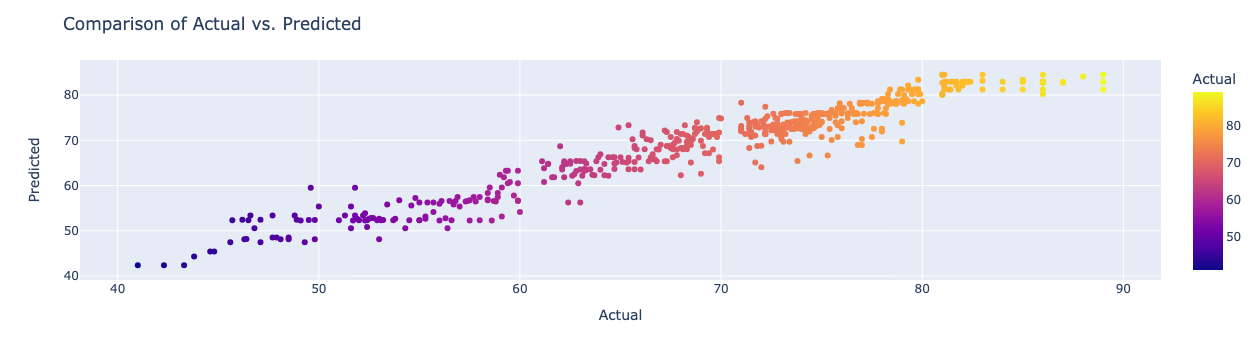

In [32]:
# Comparing the differences
comparison_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_predict})

fig = px.scatter(comparison_df, x='Actual', y='Predicted', color='Actual')
fig.update_layout(
    title='Comparison of Actual vs. Predicted',
    xaxis_title='Actual',
    yaxis_title='Predicted'
)
fig.show()

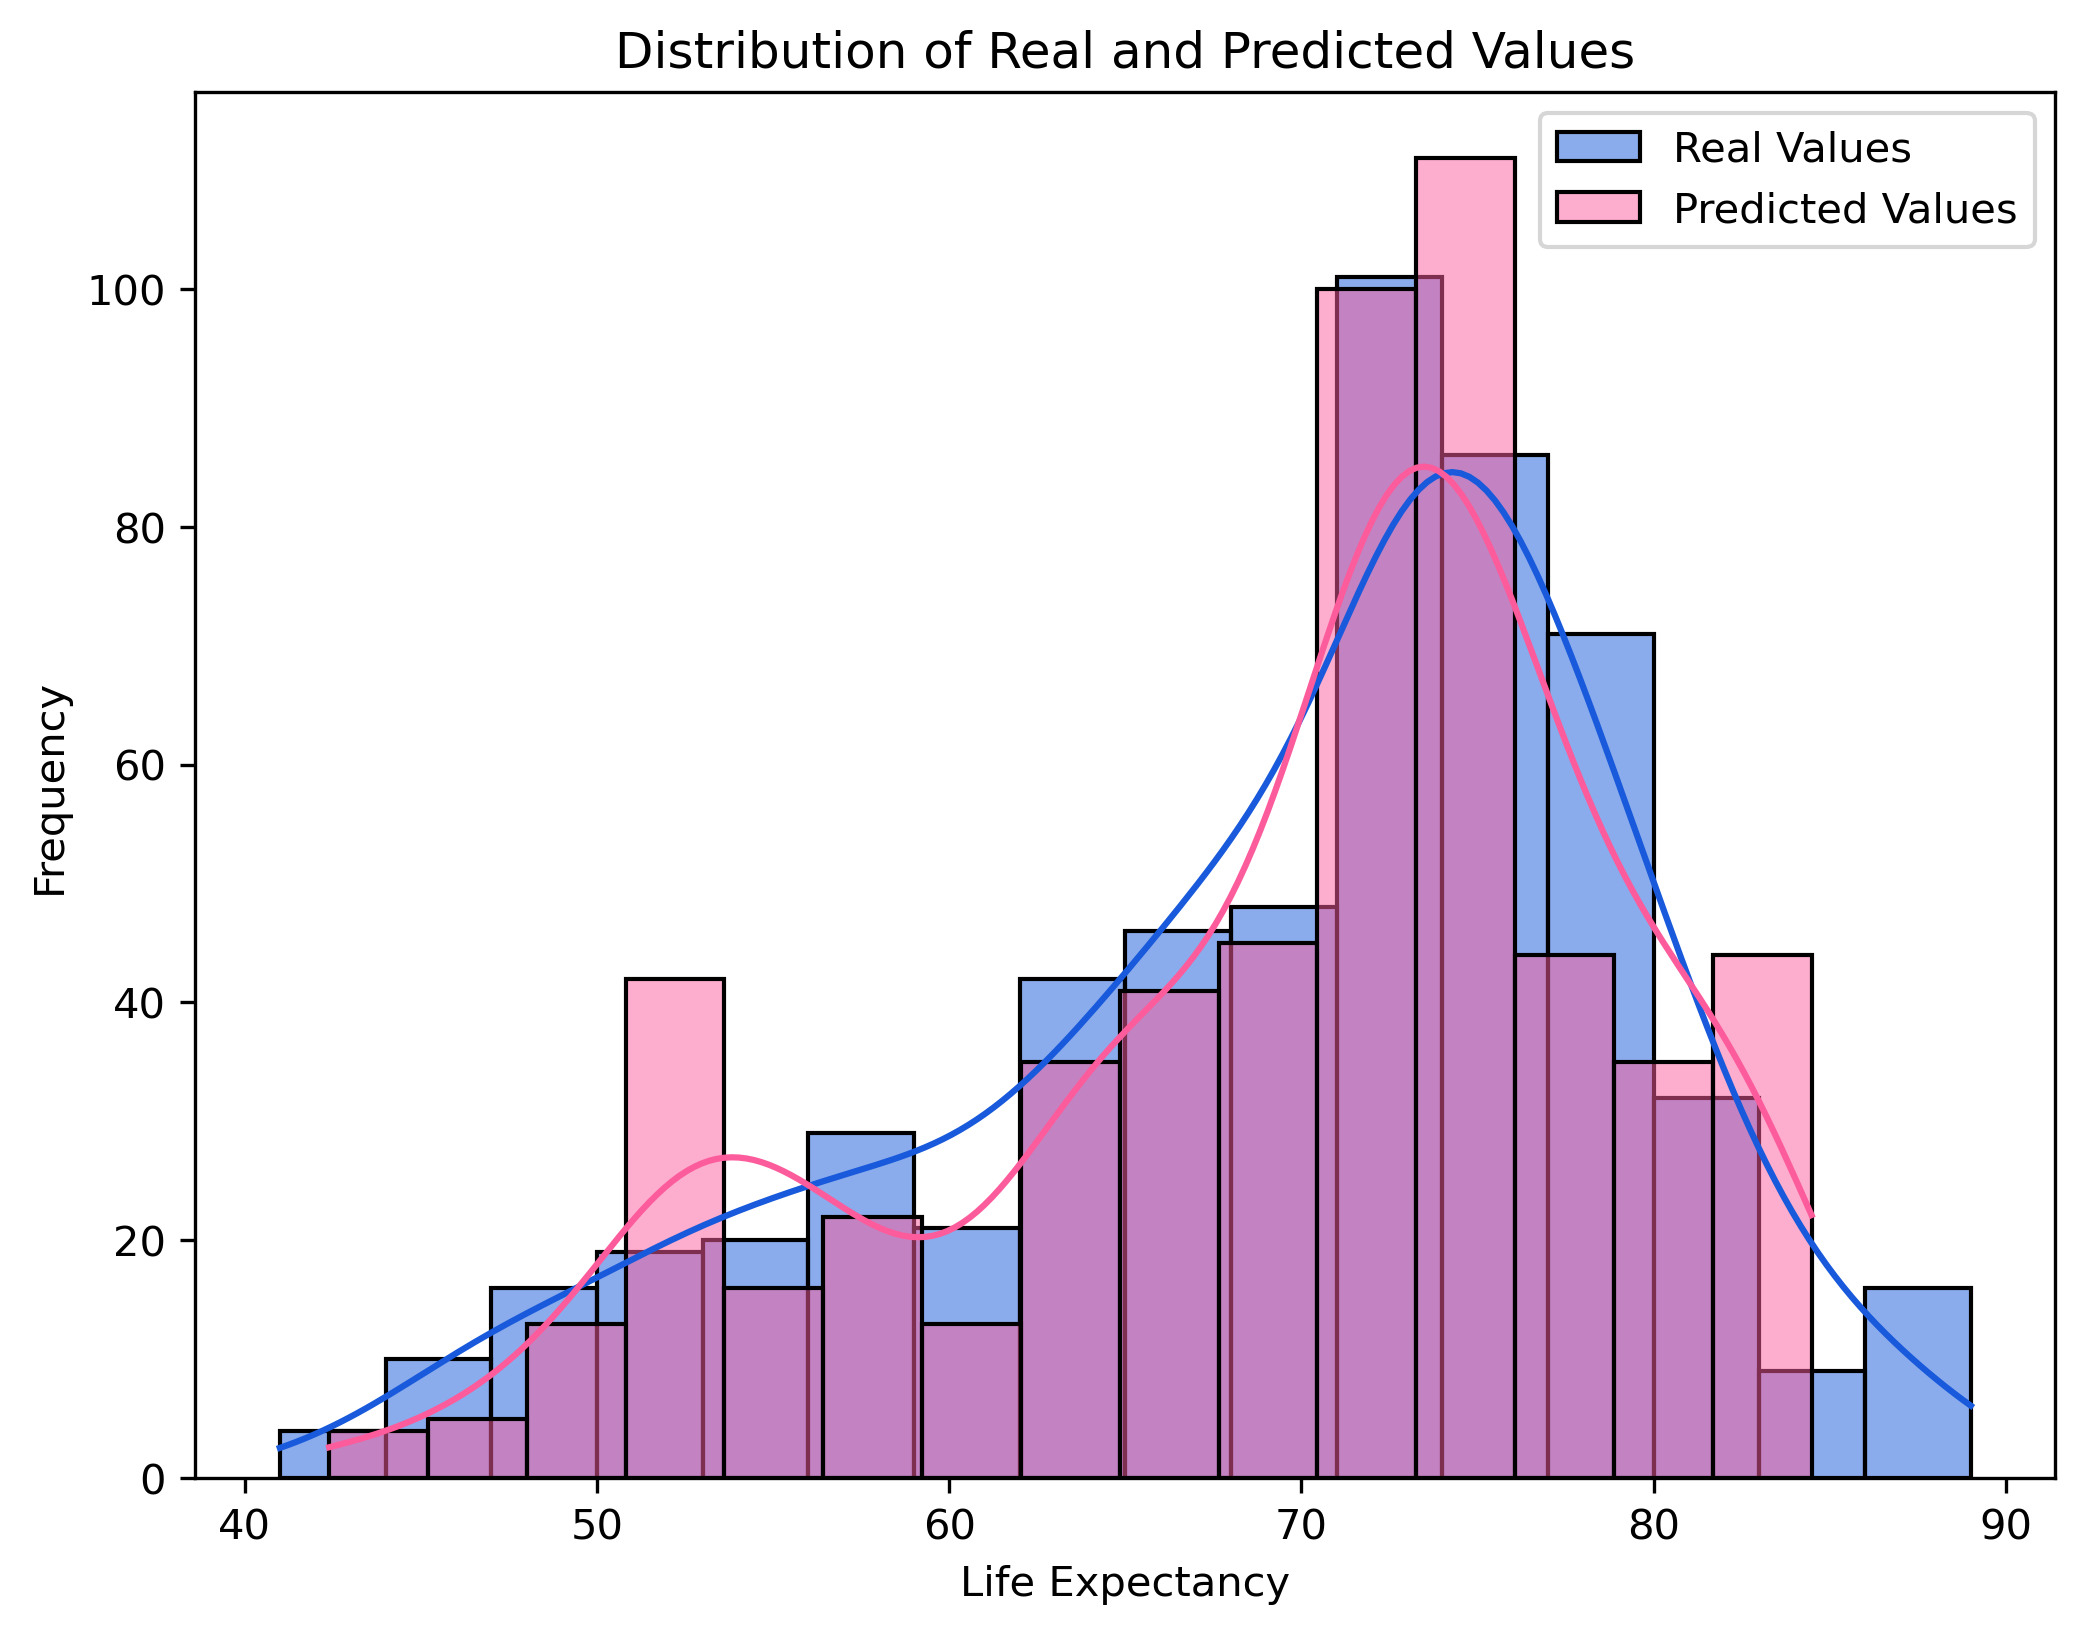

In [33]:
# Distribution of Real and Predicted Values
plt.figure(figsize=(8, 6), dpi=300)
sns.histplot(y_test, kde=True, label='Real Values', color='#185ADB')
sns.histplot(y_predict, kde=True, label='Predicted Values', color='#FC5C9C')
plt.xlabel('Life Expectancy')
plt.ylabel('Frequency')
plt.title('Distribution of Real and Predicted Values')
plt.legend()
plt.show()

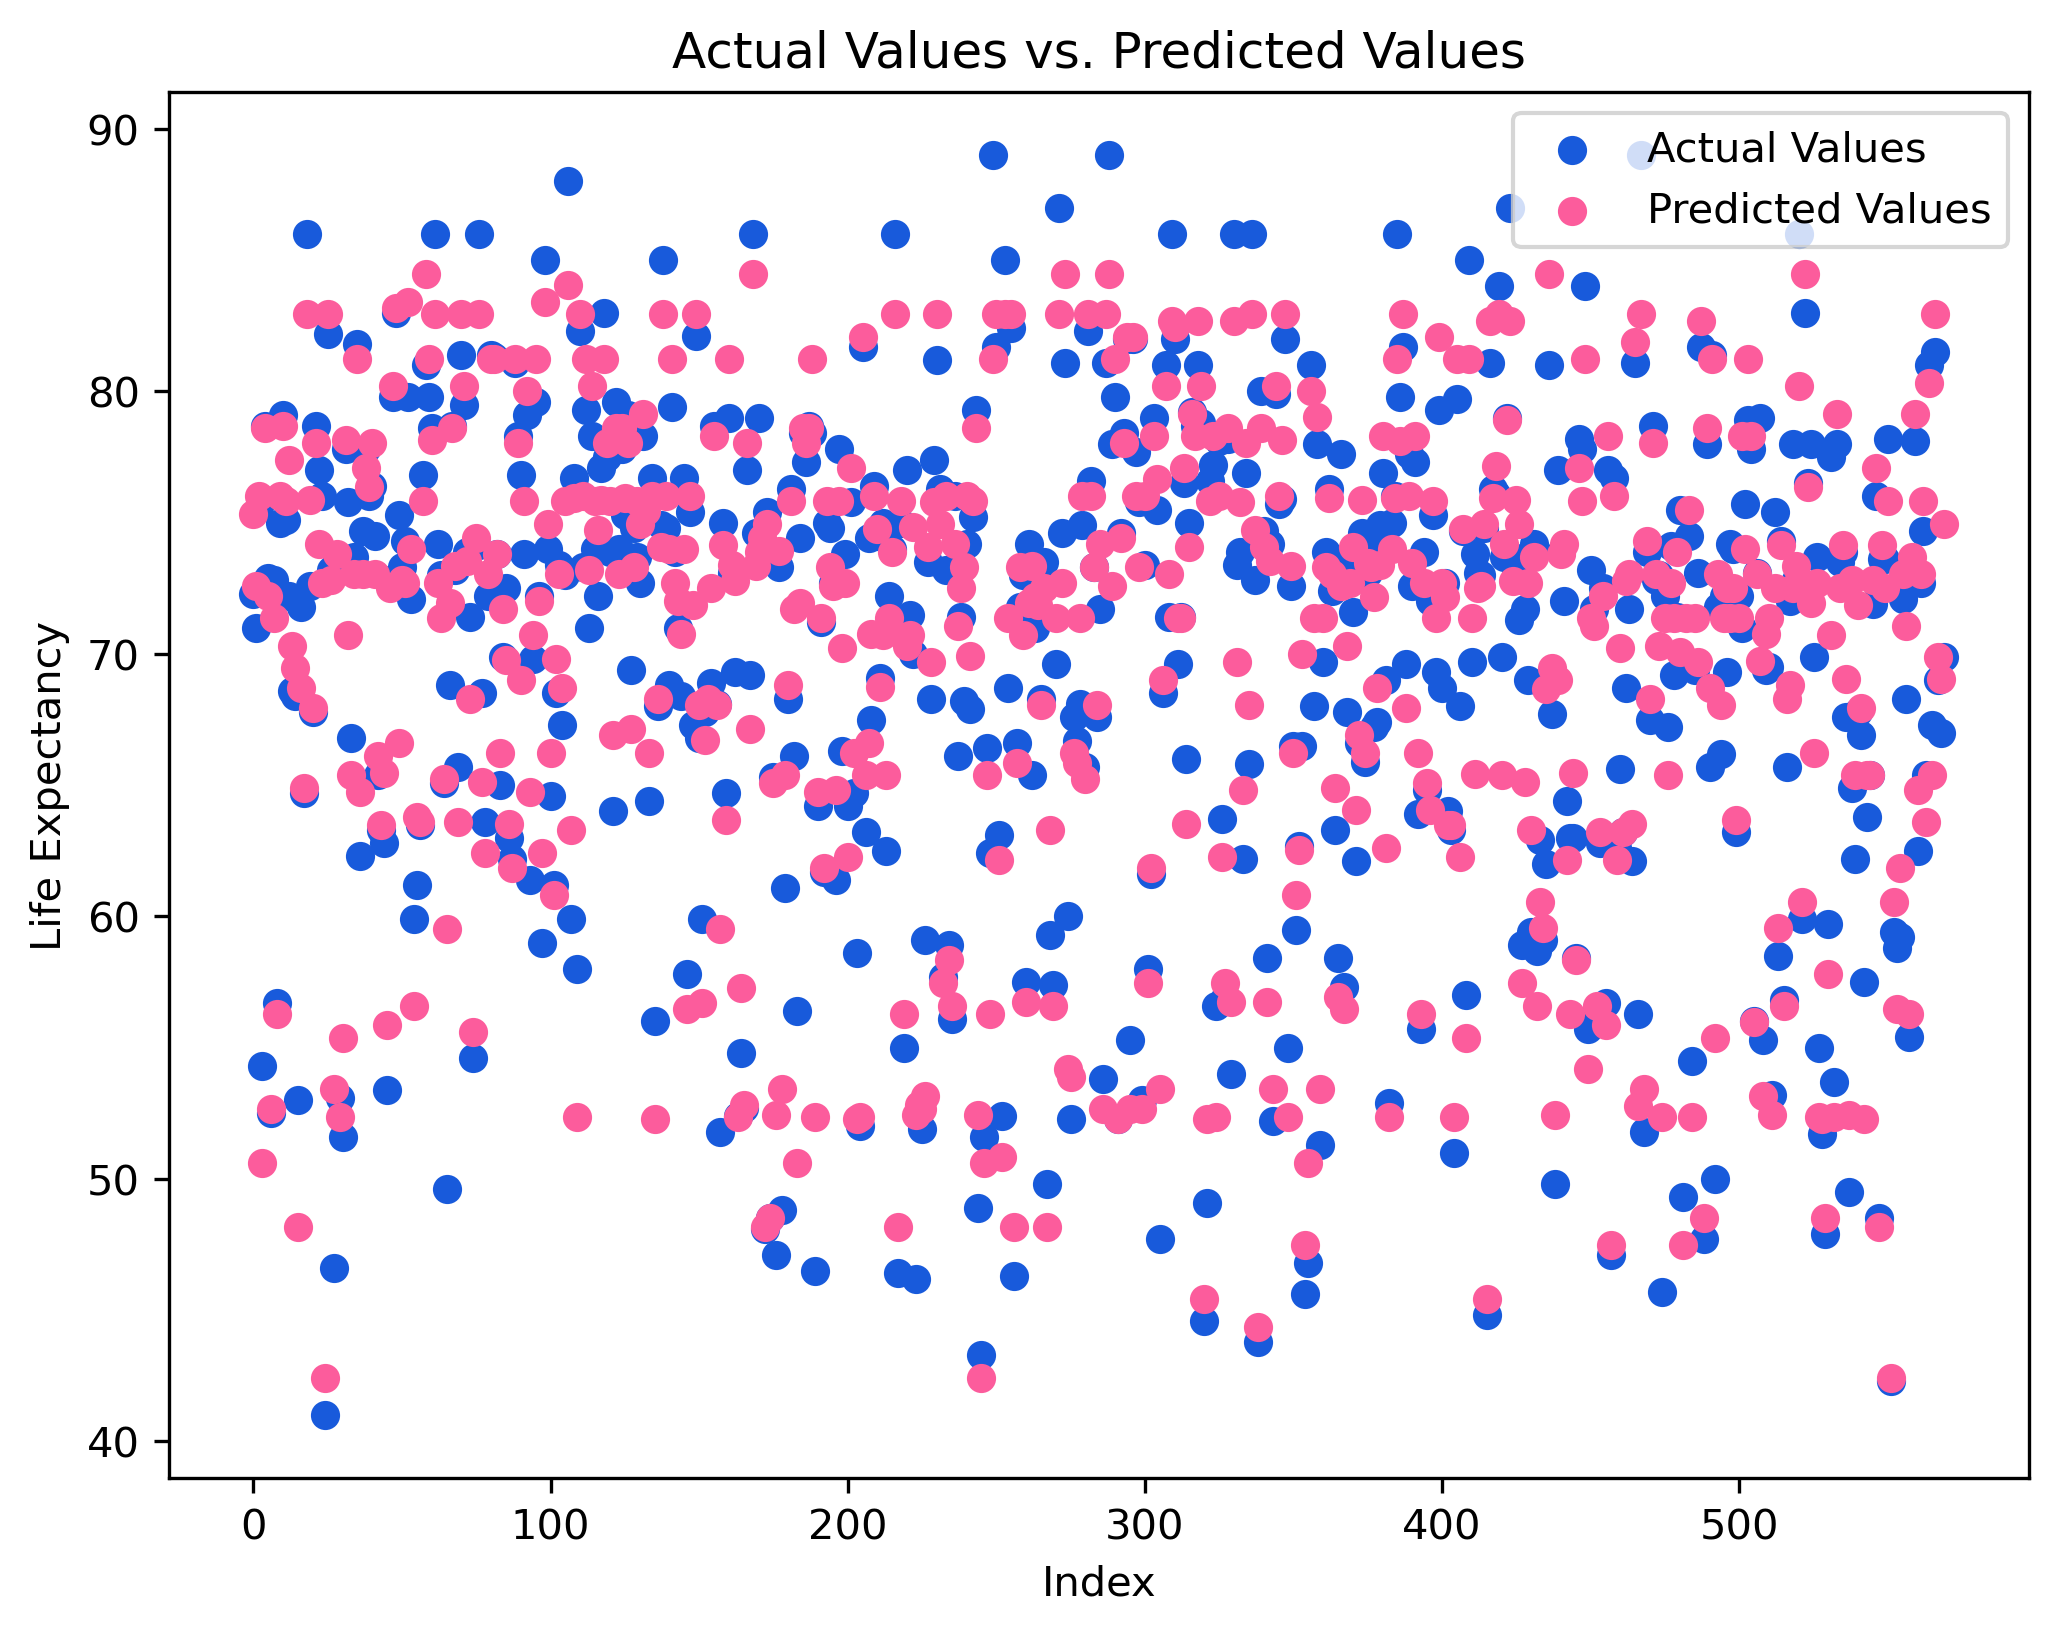

In [34]:
# Actual vs. Predicted Values Plot
plt.figure(figsize=(8, 6), dpi=300)
plt.scatter(range(len(y_test)), y_test, color='#185ADB', label='Actual Values')
plt.scatter(range(len(y_predict)), y_predict, color='#FC5C9C', label='Predicted Values')
plt.xlabel('Index')
plt.ylabel('Life Expectancy')
plt.title('Actual Values vs. Predicted Values')
plt.legend()
plt.show()

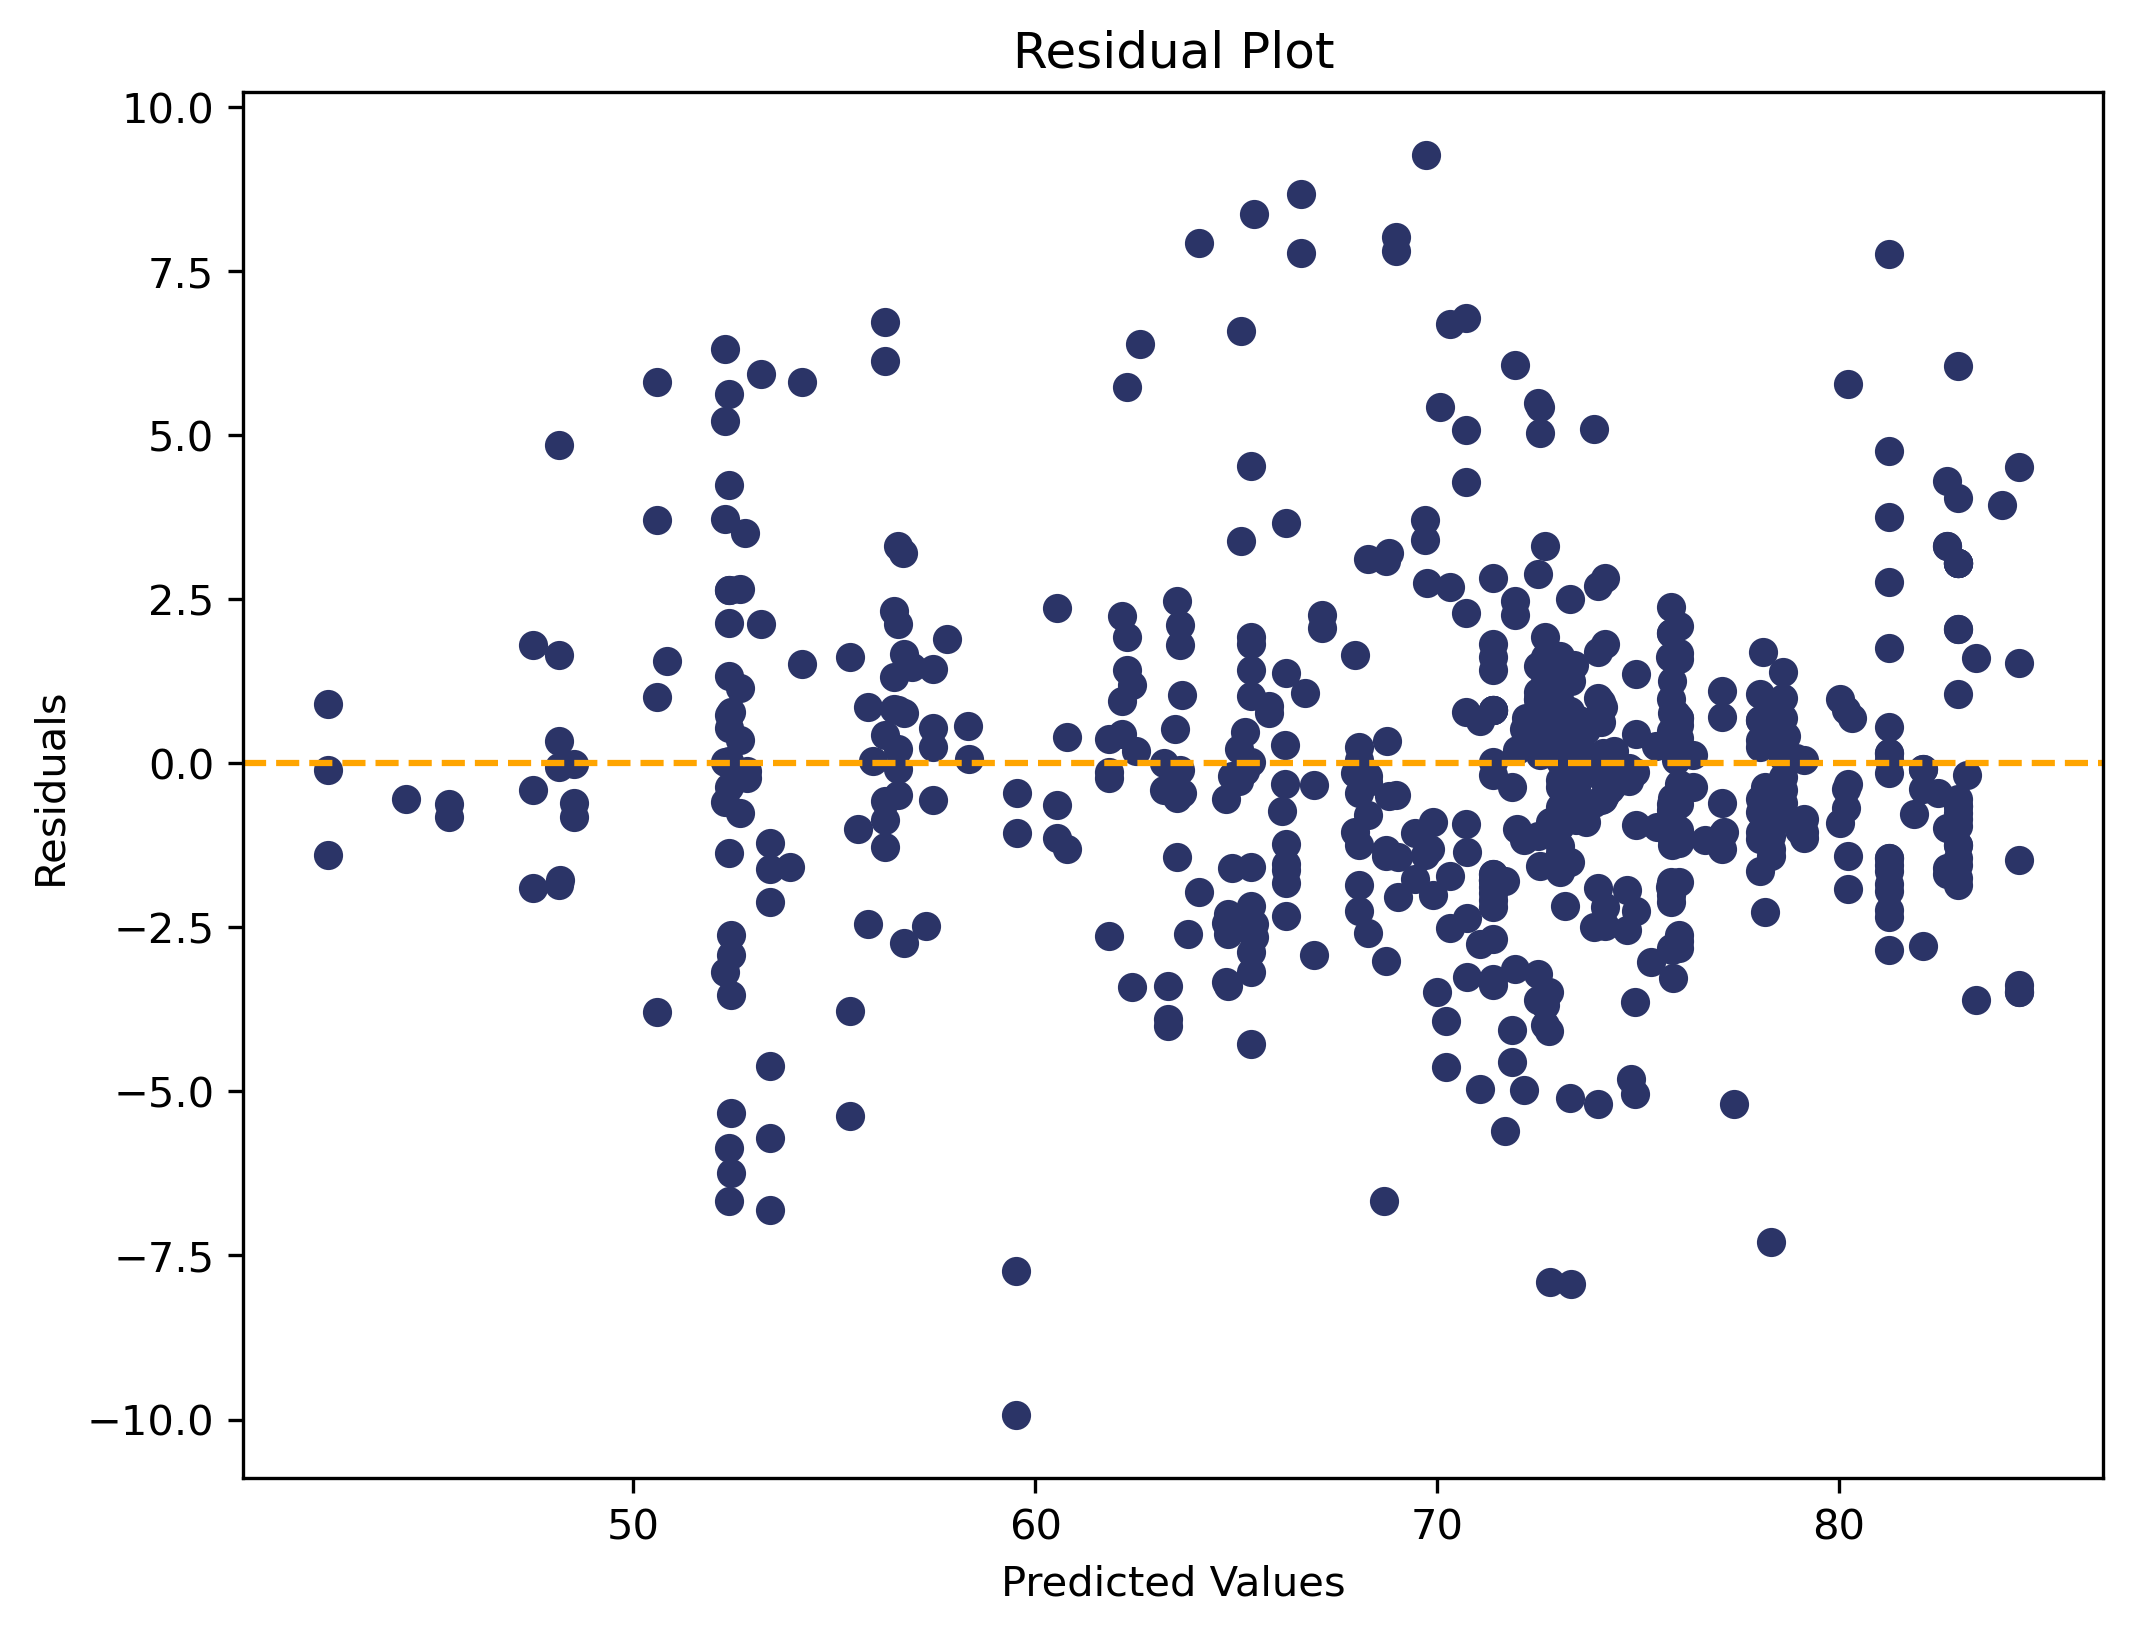

In [35]:
# Residual Plot
residuals = y_test - y_predict
plt.figure(figsize=(8, 6), dpi=300)
plt.scatter(y_predict, residuals, color='#2B3467')
plt.axhline(y=0, color='orange', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

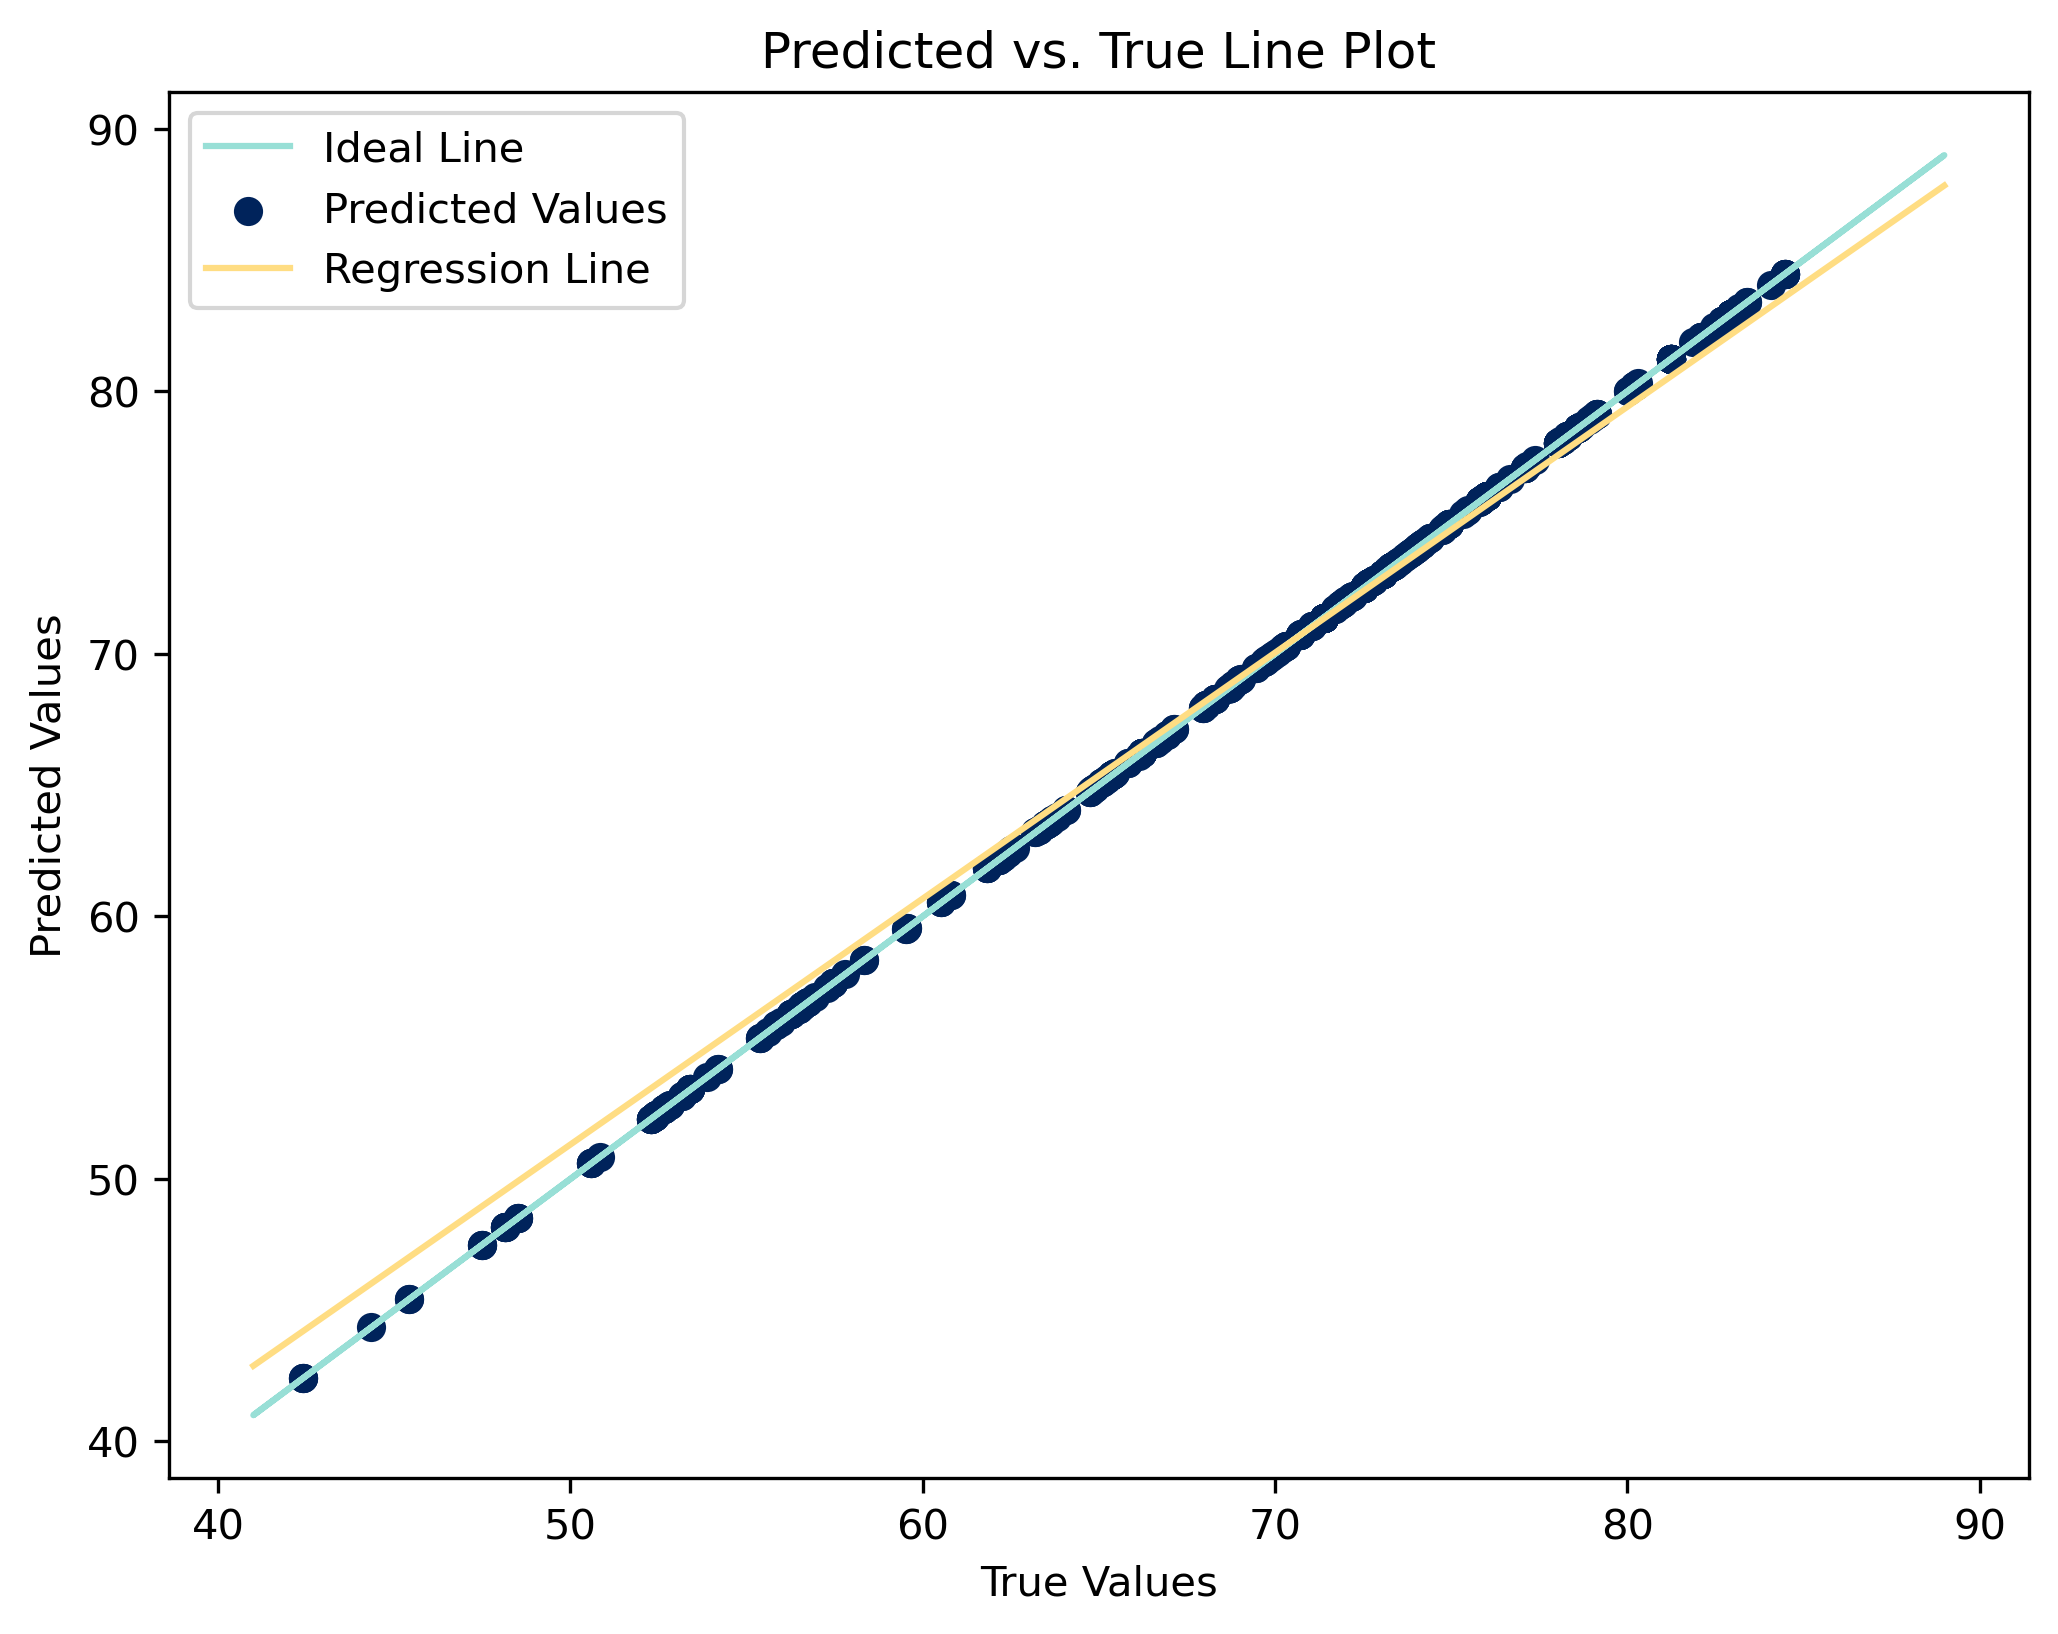

In [36]:
# Predicted vs. True Line Plot
plt.figure(figsize=(8, 6), dpi=300)
plt.plot(y_test, y_test, color='#98DFD6', label='Ideal Line')
plt.scatter(y_predict, y_predict, color='#00235B', label='Predicted Values')
plt.plot(np.unique(y_test), np.poly1d(np.polyfit(y_test, y_predict, 1))(np.unique(y_test)), color='#FFDD83', label='Regression Line')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('Predicted vs. True Line Plot')
plt.legend()
plt.show()

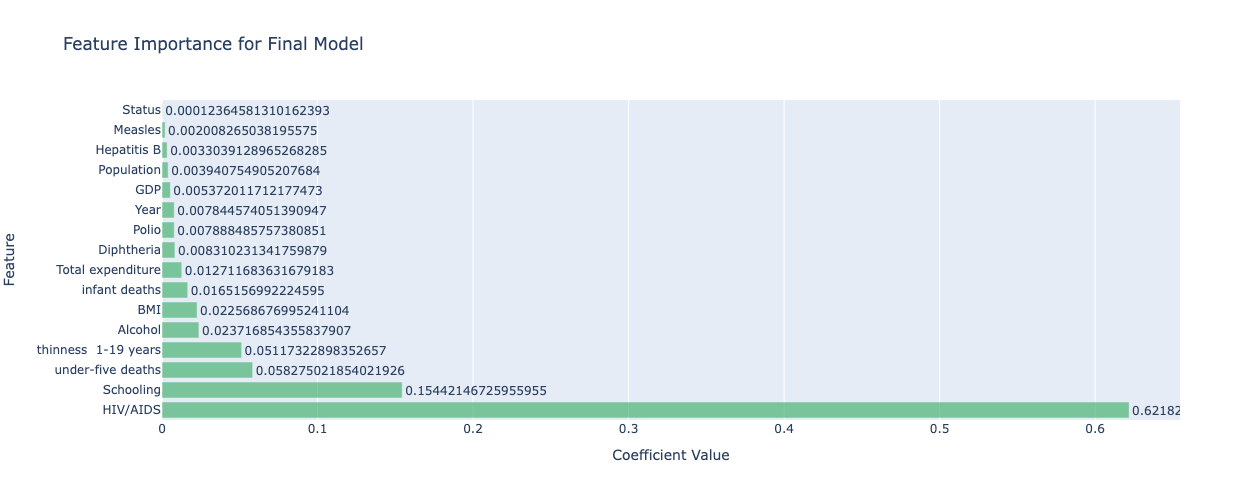

In [37]:
# Feature Importance Visualization
# feature_importance = final_model.coef_
feature_importance = final_model.feature_importances_
feature_names = X.columns
sorted_idx = np.argsort(abs(feature_importance))

fig = go.Figure()

fig.add_trace(go.Bar(
    x=feature_importance[sorted_idx],
    y=[feature_names[i] for i in sorted_idx],
    orientation='h',
    marker=dict(color='rgba(50, 171, 96, 0.6)'),
    text=feature_importance[sorted_idx],
    textposition='outside'
))

fig.update_layout(
    title='Feature Importance for Final Model',
    xaxis_title='Coefficient Value',
    yaxis_title='Feature',
    yaxis=dict(autorange='reversed'),
    height=500,
)

fig.show()


<h4>Conclusion:</h4>

From the Final Feature Importance of Final Model we can see that the selected feature Still Hold Importance and are still relevant in predicting the Performance of the Model.

<ul>
    <li>Status</li>
    <li>Diphtheria</li>
    <li>HIV/AIDS</li>
    <li>BMI</li>
    <li>Schooling</li>
</ul>


The Model has a overall efficiency of 93% which is considered moderate. This level of accuracy suggests that the model has the potential to be a valuable tool for making predictions in the domain under consideration. 

Further improvements and optimizations may be explored to enhance the model's performance, but the selected features remain critical elements contributing to its predictive capability.